# Setup

In [6]:
%pip install -q pandas scikit-learn numpy

Note: you may need to restart the kernel to use updated packages.


In [7]:
import os
import zipfile
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_validate, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, classification_report
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
path_data = "dataset"
path_dataset_download = "sonar.zip"
path_dataset_file = "dataset/sonar.all-data"

os.makedirs(path_data, exist_ok=True)
if not os.path.exists(path_dataset_download):
    !curl -L -o sonar.zip "https://archive.ics.uci.edu/static/public/151/connectionist+bench+sonar+mines+vs+rocks.zip"
zipfile.ZipFile(path_dataset_download, 'r').extractall(path_data)

In [9]:
df = pd.read_csv(path_dataset_file, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [11]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


## Separando rotulo e atributos

In [12]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1].astype('category')
label_mapping = dict(enumerate(y.cat.categories))
y = y.cat.codes

In [13]:
print("Shape dos dados:")
print(f"X: {X.shape}")
print(f"y: {y.shape}")
print(f"\nMapeamento das classes:")
for code, label in label_mapping.items():
    print(f"{code}: {label}")
print(f"\nDistribuição das classes:")
print(y.value_counts().sort_index())

Shape dos dados:
X: (208, 60)
y: (208,)

Mapeamento das classes:
0: M
1: R

Distribuição das classes:
0    111
1     97
Name: count, dtype: int64


# Experimentos de Classificação

## Função para Executar Experimentos

In [14]:
def run_experiments(X_data, y_data, model, model_name, n_runs=10, test_size=0.2, cv_folds=5):
    """
    Executa experimentos com validação cruzada e holdout
    """
    metrics = {
        "accuracy": [], "precision": [], "recall": [], 
        "f1_score": [], "kappa": []
    }
    
    scoring = {
        'accuracy': 'accuracy', 
        'precision': 'precision_macro', 
        'recall': 'recall_macro',
        'f1': 'f1_macro'
    }
    
    skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    
    for i in range(n_runs):
        # Divisão treino/teste (80%/20%)
        X_train_val, X_test, y_train_val, y_test = train_test_split(
            X_data, y_data, test_size=test_size, stratify=y_data, 
            random_state=42+i, shuffle=True
        )
        
        # Validação cruzada no conjunto de treino
        scores_cv = cross_validate(model, X_train_val, y_train_val, cv=skf, scoring=scoring)
        
        # Treino no conjunto completo e teste no holdout
        model.fit(X_train_val, y_train_val)
        y_pred = model.predict(X_test)
        
        # Métricas da validação cruzada
        metrics["accuracy"].append(scores_cv["test_accuracy"].mean())
        metrics["precision"].append(scores_cv["test_precision"].mean())
        metrics["recall"].append(scores_cv["test_recall"].mean())
        metrics["f1_score"].append(scores_cv["test_f1"].mean())
        
        # Kappa do teste holdout
        metrics["kappa"].append(cohen_kappa_score(y_test, y_pred))
    
    # Converter para DataFrame e calcular estatísticas
    df_metrics = pd.DataFrame(metrics)
    
    print(f"\n=== Resultados {model_name} ===")
    print(df_metrics.describe())
    
    return df_metrics

## Busca de Hiperparâmetros

In [15]:
def find_best_mlp_params(X_data, y_data, use_pca=False, n_components=None):
    """
    Busca os melhores hiperparâmetros para MLP
    """
    print(f"\n=== Busca de Hiperparâmetros MLP (PCA: {use_pca}) ===")
    
    # Pipeline
    if use_pca:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=n_components)),
            ('mlp', MLPClassifier(max_iter=1000, random_state=42))
        ])
        param_grid = {
            'mlp__hidden_layer_sizes': [(50,), (100,), (60,), (50, 30), (100, 50)],
            'mlp__alpha': [0.0001, 0.001, 0.01, 0.1],
            'mlp__learning_rate_init': [0.001, 0.01]
        }
    else:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('mlp', MLPClassifier(max_iter=1000, random_state=42))
        ])
        param_grid = {
            'mlp__hidden_layer_sizes': [(50,), (100,), (60,), (50, 30), (100, 50)],
            'mlp__alpha': [0.0001, 0.001, 0.01, 0.1],
            'mlp__learning_rate_init': [0.001, 0.01]
        }
    
    # Grid Search
    grid_search = GridSearchCV(
        pipeline, param_grid, cv=5, scoring='accuracy', 
        n_jobs=-1, verbose=1
    )
    
    grid_search.fit(X_data, y_data)
    
    print(f"Melhores parâmetros: {grid_search.best_params_}")
    print(f"Melhor score: {grid_search.best_score_:.4f}")
    
    return grid_search.best_estimator_

def find_best_svm_params(X_data, y_data, use_pca=False, n_components=None):
    """
    Busca os melhores hiperparâmetros para SVM
    """
    print(f"\n=== Busca de Hiperparâmetros SVM (PCA: {use_pca}) ===")
    
    # Pipeline
    if use_pca:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=n_components)),
            ('svm', SVC(kernel='rbf', random_state=42))
        ])
        param_grid = {
            'svm__C': [0.1, 1, 10, 100],
            'svm__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
        }
    else:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('svm', SVC(kernel='rbf', random_state=42))
        ])
        param_grid = {
            'svm__C': [0.1, 1, 10, 100],
            'svm__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
        }
    
    # Grid Search
    grid_search = GridSearchCV(
        pipeline, param_grid, cv=5, scoring='accuracy', 
        n_jobs=-1, verbose=1
    )
    
    grid_search.fit(X_data, y_data)
    
    print(f"Melhores parâmetros: {grid_search.best_params_}")
    print(f"Melhor score: {grid_search.best_score_:.4f}")
    
    return grid_search.best_estimator_

# Cenário 1: Sem PCA

## Busca de Hiperparâmetros - Sem PCA

In [16]:
# Buscar melhores parâmetros para MLP sem PCA
best_mlp_no_pca = find_best_mlp_params(X, y, use_pca=False)


=== Busca de Hiperparâmetros MLP (PCA: False) ===
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Melhores parâmetros: {'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (100, 50), 'mlp__learning_rate_init': 0.001}
Melhor score: 0.6786
Melhores parâmetros: {'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (100, 50), 'mlp__learning_rate_init': 0.001}
Melhor score: 0.6786


In [17]:
# Buscar melhores parâmetros para SVM sem PCA
best_svm_no_pca = find_best_svm_params(X, y, use_pca=False)


=== Busca de Hiperparâmetros SVM (PCA: False) ===
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Melhores parâmetros: {'svm__C': 10, 'svm__gamma': 'scale'}
Melhor score: 0.6445
Melhores parâmetros: {'svm__C': 10, 'svm__gamma': 'scale'}
Melhor score: 0.6445


## Experimentos - Sem PCA

In [18]:
# Executar experimentos com MLP sem PCA
results_mlp_no_pca = run_experiments(X, y, best_mlp_no_pca, "MLP sem PCA")


=== Resultados MLP sem PCA ===
        accuracy  precision     recall   f1_score      kappa
count  10.000000  10.000000  10.000000  10.000000  10.000000
mean    0.848235   0.852867   0.846439   0.846284   0.735738
std     0.020133   0.021695   0.020305   0.020049   0.127408
min     0.819430   0.822658   0.817443   0.817500   0.518349
25%     0.837522   0.840624   0.834673   0.835037   0.711009
50%     0.849198   0.853443   0.848051   0.847381   0.736574
75%     0.853699   0.857272   0.851471   0.852106   0.796369
max     0.880214   0.888099   0.878979   0.877907   0.952164


In [19]:
# Executar experimentos com SVM sem PCA
results_svm_no_pca = run_experiments(X, y, best_svm_no_pca, "SVM sem PCA")


=== Resultados SVM sem PCA ===
        accuracy  precision     recall   f1_score      kappa
count  10.000000  10.000000  10.000000  10.000000  10.000000
mean    0.858449   0.868753   0.854917   0.855220   0.768733
std     0.021411   0.020554   0.022731   0.022486   0.097042
min     0.830660   0.840235   0.821618   0.822143   0.611111
25%     0.840241   0.848202   0.835235   0.837464   0.710010
50%     0.858556   0.872453   0.856569   0.855542   0.759725
75%     0.873663   0.887099   0.870313   0.871036   0.856328
max     0.891800   0.894202   0.890645   0.891039   0.904545


# Cenário 2: Com PCA

## Análise PCA

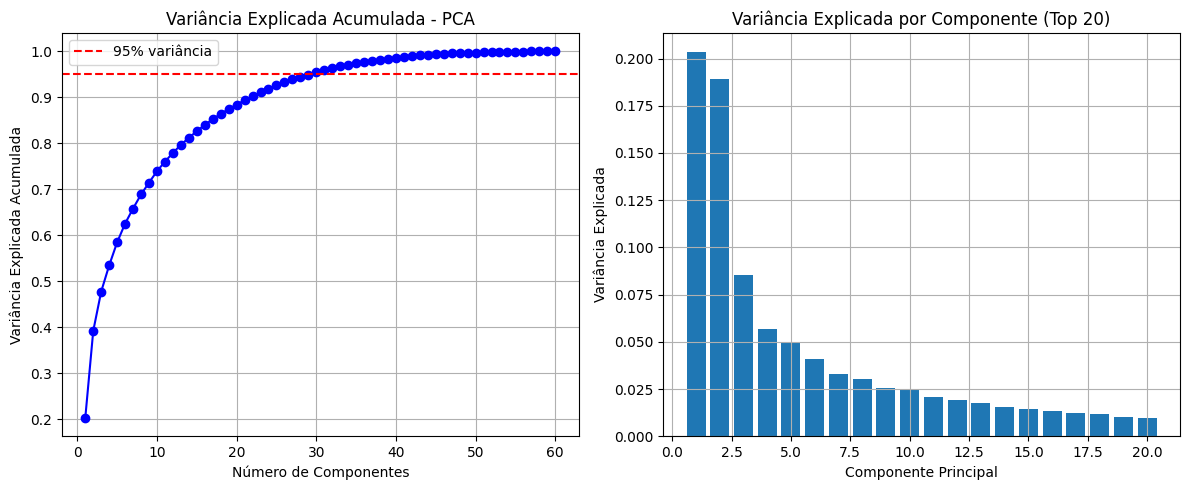

Número de componentes para 95% da variância: 30
Variância explicada com 30 componentes: 0.9542
Número de componentes para experimentos: 20
Variância explicada com 20 componentes: 0.8839


In [20]:
# Análise da variância explicada pelo PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca_full = PCA()
pca_full.fit(X_scaled)

# Plotar variância explicada
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), 
         np.cumsum(pca_full.explained_variance_ratio_), 'bo-')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variância')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada Acumulada - PCA')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.bar(range(1, 21), pca_full.explained_variance_ratio_[:20])
plt.xlabel('Componente Principal')
plt.ylabel('Variância Explicada')
plt.title('Variância Explicada por Componente (Top 20)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Determinar número de componentes para 95% da variância
n_components_95 = np.argmax(np.cumsum(pca_full.explained_variance_ratio_) >= 0.95) + 1
print(f"Número de componentes para 95% da variância: {n_components_95}")
print(f"Variância explicada com {n_components_95} componentes: {np.cumsum(pca_full.explained_variance_ratio_)[n_components_95-1]:.4f}")

# Vamos usar um número menor para facilitar os experimentos
n_components_exp = min(20, n_components_95)
print(f"Número de componentes para experimentos: {n_components_exp}")
print(f"Variância explicada com {n_components_exp} componentes: {np.cumsum(pca_full.explained_variance_ratio_)[n_components_exp-1]:.4f}")

## Busca de Hiperparâmetros - Com PCA

In [21]:
# Buscar melhores parâmetros para MLP com PCA
best_mlp_pca = find_best_mlp_params(X, y, use_pca=True, n_components=n_components_exp)


=== Busca de Hiperparâmetros MLP (PCA: True) ===
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Melhores parâmetros: {'mlp__alpha': 0.1, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate_init': 0.01}
Melhor score: 0.6933
Melhores parâmetros: {'mlp__alpha': 0.1, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate_init': 0.01}
Melhor score: 0.6933


In [22]:
# Buscar melhores parâmetros para SVM com PCA
best_svm_pca = find_best_svm_params(X, y, use_pca=True, n_components=n_components_exp)


=== Busca de Hiperparâmetros SVM (PCA: True) ===
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Melhores parâmetros: {'svm__C': 10, 'svm__gamma': 'auto'}
Melhor score: 0.6877


## Experimentos - Com PCA

In [23]:
# Executar experimentos com MLP com PCA
results_mlp_pca = run_experiments(X, y, best_mlp_pca, "MLP com PCA")


=== Resultados MLP com PCA ===
        accuracy  precision     recall   f1_score      kappa
count  10.000000  10.000000  10.000000  10.000000  10.000000
mean    0.836168   0.841643   0.834152   0.833842   0.678003
std     0.030603   0.031519   0.030839   0.030680   0.107543
min     0.777362   0.776926   0.776054   0.776056   0.466513
25%     0.832531   0.838730   0.827192   0.829140   0.616438
50%     0.840374   0.847377   0.839367   0.838725   0.711669
75%     0.849153   0.855072   0.847324   0.847154   0.760820
max     0.886275   0.893742   0.884812   0.883180   0.807339


In [24]:
# Executar experimentos com SVM com PCA
results_svm_pca = run_experiments(X, y, best_svm_pca, "SVM com PCA")


=== Resultados SVM com PCA ===
        accuracy  precision     recall   f1_score      kappa
count  10.000000  10.000000  10.000000  10.000000  10.000000
mean    0.857255   0.870158   0.852700   0.853364   0.676942
std     0.022114   0.024251   0.023217   0.022446   0.117658
min     0.818895   0.827560   0.812443   0.815133   0.464037
25%     0.845009   0.860602   0.840554   0.839159   0.662456
50%     0.858378   0.870132   0.854114   0.855138   0.735367
75%     0.865731   0.874994   0.861342   0.863092   0.759725
max     0.904456   0.923021   0.901944   0.899594   0.760820


# Comparação dos Resultados

In [25]:
# Função para criar tabela de comparação
def create_comparison_table(results_dict):
    """
    Cria tabela de comparação dos resultados
    """
    comparison_data = {}
    
    for name, results in results_dict.items():
        comparison_data[name] = {
            'Accuracy (mean ± std)': f"{results['accuracy'].mean():.4f} ± {results['accuracy'].std():.4f}",
            'Precision (mean ± std)': f"{results['precision'].mean():.4f} ± {results['precision'].std():.4f}",
            'Recall (mean ± std)': f"{results['recall'].mean():.4f} ± {results['recall'].std():.4f}",
            'F1-Score (mean ± std)': f"{results['f1_score'].mean():.4f} ± {results['f1_score'].std():.4f}",
            'Kappa (mean ± std)': f"{results['kappa'].mean():.4f} ± {results['kappa'].std():.4f}"
        }
    
    comparison_df = pd.DataFrame(comparison_data).T
    return comparison_df

# Criar dicionário com todos os resultados
all_results = {
    'MLP sem PCA': results_mlp_no_pca,
    'SVM sem PCA': results_svm_no_pca,
    'MLP com PCA': results_mlp_pca,
    'SVM com PCA': results_svm_pca
}

# Criar tabela de comparação
comparison_table = create_comparison_table(all_results)
print("=== TABELA DE COMPARAÇÃO DOS RESULTADOS ===")
print(comparison_table)

=== TABELA DE COMPARAÇÃO DOS RESULTADOS ===
            Accuracy (mean ± std) Precision (mean ± std) Recall (mean ± std)  \
MLP sem PCA       0.8482 ± 0.0201        0.8529 ± 0.0217     0.8464 ± 0.0203   
SVM sem PCA       0.8584 ± 0.0214        0.8688 ± 0.0206     0.8549 ± 0.0227   
MLP com PCA       0.8362 ± 0.0306        0.8416 ± 0.0315     0.8342 ± 0.0308   
SVM com PCA       0.8573 ± 0.0221        0.8702 ± 0.0243     0.8527 ± 0.0232   

            F1-Score (mean ± std) Kappa (mean ± std)  
MLP sem PCA       0.8463 ± 0.0200    0.7357 ± 0.1274  
SVM sem PCA       0.8552 ± 0.0225    0.7687 ± 0.0970  
MLP com PCA       0.8338 ± 0.0307    0.6780 ± 0.1075  
SVM com PCA       0.8534 ± 0.0224    0.6769 ± 0.1177  


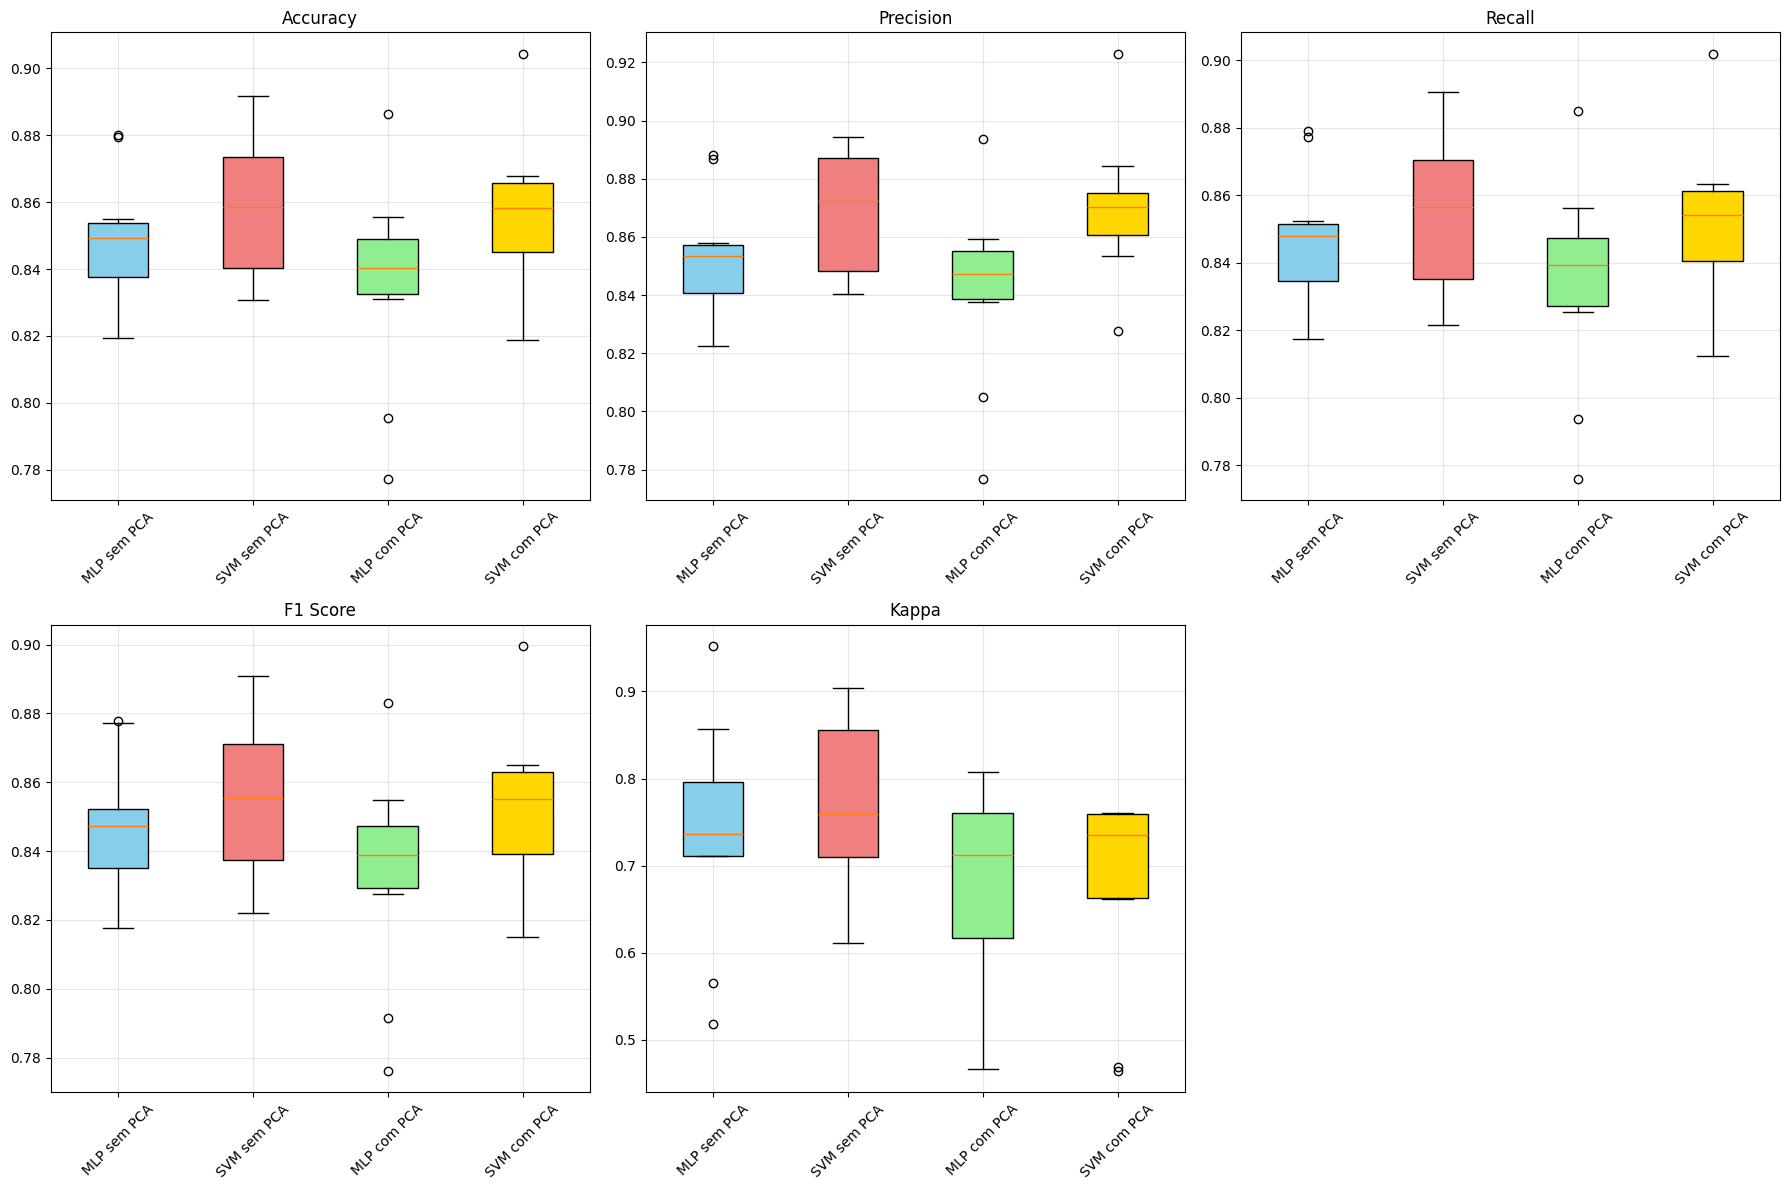


=== ANÁLISE DOS MELHORES RESULTADOS ===

ACCURACY:
  Melhor método: SVM sem PCA (0.8584)
  MLP sem PCA: 0.8482 ± 0.0201
  SVM sem PCA: 0.8584 ± 0.0214
  MLP com PCA: 0.8362 ± 0.0306
  SVM com PCA: 0.8573 ± 0.0221

PRECISION:
  Melhor método: SVM com PCA (0.8702)
  MLP sem PCA: 0.8529 ± 0.0217
  SVM sem PCA: 0.8688 ± 0.0206
  MLP com PCA: 0.8416 ± 0.0315
  SVM com PCA: 0.8702 ± 0.0243

RECALL:
  Melhor método: SVM sem PCA (0.8549)
  MLP sem PCA: 0.8464 ± 0.0203
  SVM sem PCA: 0.8549 ± 0.0227
  MLP com PCA: 0.8342 ± 0.0308
  SVM com PCA: 0.8527 ± 0.0232

F1_SCORE:
  Melhor método: SVM sem PCA (0.8552)
  MLP sem PCA: 0.8463 ± 0.0200
  SVM sem PCA: 0.8552 ± 0.0225
  MLP com PCA: 0.8338 ± 0.0307
  SVM com PCA: 0.8534 ± 0.0224

KAPPA:
  Melhor método: SVM sem PCA (0.7687)
  MLP sem PCA: 0.7357 ± 0.1274
  SVM sem PCA: 0.7687 ± 0.0970
  MLP com PCA: 0.6780 ± 0.1075
  SVM com PCA: 0.6769 ± 0.1177


In [26]:
# Gráficos de comparação
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'kappa']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

for i, metric in enumerate(metrics):
    row = i // 3
    col = i % 3
    
    data_to_plot = [all_results[name][metric] for name in all_results.keys()]
    labels = list(all_results.keys())
    
    bp = axes[row, col].boxplot(data_to_plot, labels=labels, patch_artist=True)
    
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    axes[row, col].set_title(f'{metric.replace("_", " ").title()}')
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].grid(True, alpha=0.3)

# Remover subplot vazio
axes[1, 2].remove()

plt.tight_layout()
plt.show()

# Análise estatística simples
print("\n=== ANÁLISE DOS MELHORES RESULTADOS ===")
for metric in metrics:
    print(f"\n{metric.upper()}:")
    best_method = max(all_results.keys(), key=lambda x: all_results[x][metric].mean())
    best_score = all_results[best_method][metric].mean()
    print(f"  Melhor método: {best_method} ({best_score:.4f})")
    
    for name in all_results.keys():
        score = all_results[name][metric]
        print(f"  {name}: {score.mean():.4f} ± {score.std():.4f}")